In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
import datetime
from itertools import islice

In [2]:
matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

In [3]:
def parse_timestamp(el):
    b = datetime.datetime.strptime(el, fmt)
    return b

In [4]:
def create_date_col(df_m):
    date_lst = []
    for index, row in df_m.iterrows():
        day = str(df_m['ride_begin'][index].day)
        month = str(df_m['ride_begin'][index].month)
        year = str(df_m['ride_begin'][index].year)
        date_text = year + '-' + month + '-' + day
        date_lst.append(date_text)
    return date_lst

In [5]:
fmt = '%Y-%m-%d %H:%M:%S'

In [6]:
url = "/bigdata/jelicicna/mobility_data_2020/anlysis_data_nextbike_2020-01.csv"
df = pd.read_csv(url, sep=';', low_memory=False)

In [7]:
url2 = "/bigdata/jelicicna/clustering_datasets/locations_for_clustering_2020-01.csv"
df_locations = pd.read_csv(url2, sep=';', low_memory=False)

In [8]:
df.drop('old_index', axis=1, inplace=True)

In [9]:
df['ride_begin'] = df['ride_begin'].map(parse_timestamp)
df['ride_end'] = df['ride_end'].map(parse_timestamp)

In [10]:
#separate data for clustering
x = df_locations.iloc[:,2:4]

In [11]:
x.head()

,lat,lng
0,50.9410,6.9770
1,50.9201,6.9859
2,50.9748,6.9734
3,50.9442,7.0028
4,50.9360,6.9543


In [12]:
X = x.to_numpy()

## Agglomerative clustering

In [13]:
# A method for generating dendrogram
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [14]:
# instantiate Agglomerative Clustering instance
clustering_model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

In [15]:
# call fit method with array of sample coordinates passed as a parameter
categories = clustering_model.fit(X)

In [16]:
categories.labels_

array([46040, 35107, 31988, ...,     5,     2,     0])

In [17]:
clustering_model.children_

array([[    0,  2414],
       [  757, 16343],
       [ 2460, 43636],
       ...,
       [92069, 92077],
       [92076, 92078],
       [92074, 92079]])

In [18]:
clustering_model.distances_.max()

7.25917505901878

In [19]:
clustering_model.distances_.min()

9.999999999621423e-05

In [20]:
# instantiate Agglomerative Clustering instance
clustering_model = AgglomerativeClustering(distance_threshold=0.3, n_clusters=None)

# call fit method with array of sample coordinates passed as a parameter
categories = clustering_model.fit(X)

categories.labels_

array([17, 38, 13, ...,  7, 17,  2])

In [21]:
df_locations['cluster'] = categories.labels_

In [22]:
#plot dendrogram to visualize clusters
#plot_dendrogram(categories)

In [23]:
# instantiate Agglomerative Clustering instance
clustering_model2 = AgglomerativeClustering(distance_threshold=0.2, n_clusters=None)

# call fit method with array of sample coordinates passed as a parameter
categories2 = clustering_model2.fit(X)

categories2.labels_

array([ 8, 18, 28, ..., 44,  8, 45])

In [24]:
df_locations['cluster2'] = categories2.labels_

In [25]:
len(df_locations['cluster'].value_counts())

41

In [26]:
len(df_locations['cluster2'].value_counts())

59

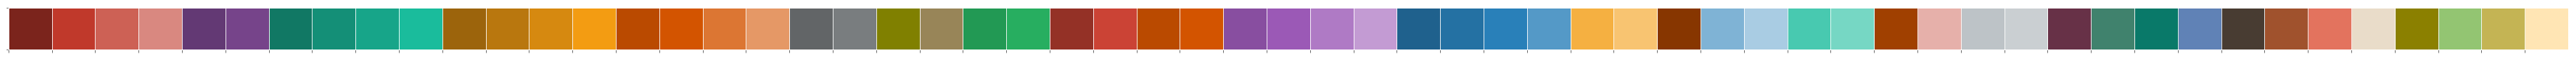

In [31]:
customPalette = ['#7b241c', '#c0392b', '#cd6155', '#d98880', '#633974', '#76448a',
                 '#117864', '#148f77', '#17a589', '#1abc9c',
                 '#9c640c', '#b9770e', '#d68910', '#f39c12',
                 '#ba4a00', '#d35400', '#dc7633', '#e59866', '#626567', '#797d7f',
                 '#808000', '#988558', '#229954', '#27ae60', '#943126', '#cb4335', '#ba4a00', '#d35400',
                 '#884ea0', '#9b59b6', '#af7ac5', '#c39bd3',
                 '#1f618d', '#2471a3', '#2980b9', '#5499c7', '#f5b041', '#f8c471', '#873600','#7fb3d5', '#a9cce3',
                 '#48c9b0', '#76d7c4', '#a04000', '#e6b0aa', '#bdc3c7', '#cacfd2',
                 '#673147', '#40826D', '#097969', '#6082B6', '#483C32', '#A0522D',
                 '#E3735E', '#E9DCC9', '#8B8000', '#93C572', '#C4B454', '#FFE5B4']
sns.set_palette(customPalette)
sns.palplot(customPalette)

In [28]:
labels = set(df_locations['cluster'].to_list())
labels2 = set(df_locations['cluster2'].to_list())

Text(0, 0.5, 'Latitude')

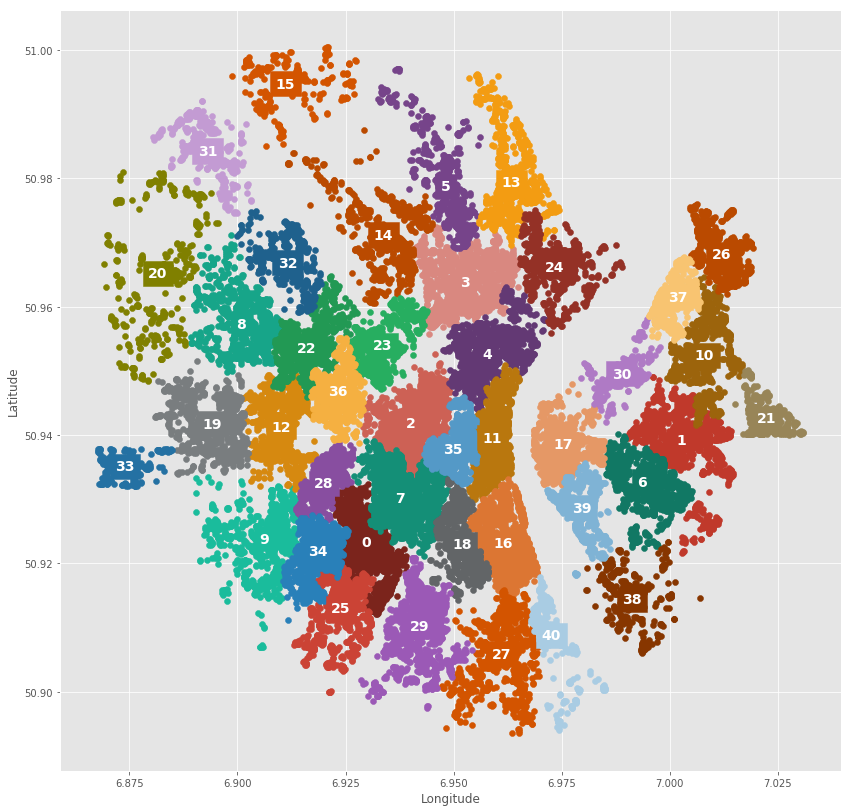

In [29]:
#create a new figure
plt.figure(figsize=(14,14))

#loop through labels and plot each cluster
for l in labels:

    #add data points 
    plt.scatter(x=df_locations.loc[df_locations['cluster']==l, 'lng'], 
                y=df_locations.loc[df_locations['cluster']==l, 'lat'], 
                color=customPalette[l], 
                alpha=1)
    
    #add label
    plt.annotate(l, 
                 df_locations.loc[df_locations['cluster']==l,['lng','lat']].mean(),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=14, weight='bold',
                 color='white',
                 backgroundcolor=customPalette[l]) 
plt.xlabel('Longitude')
plt.ylabel('Latitude')

In [33]:
df_locations['cluster'].value_counts()

7     2766
0     2384
2     2053
11    2008
3     1991
1     1860
16    1803
29    1609
4     1606
6     1580
22    1404
17    1342
34    1293
12    1234
9     1167
36    1146
8     1143
35    1132
10    1125
28    1095
27    1091
25    1070
19    1037
23    1024
13    1011
26     930
24     860
37     813
5      813
18     803
14     708
39     611
32     515
40     484
38     455
20     454
21     390
31     381
30     356
15     306
33     188
Name: cluster, dtype: int64

Text(0, 0.5, 'Latitude')

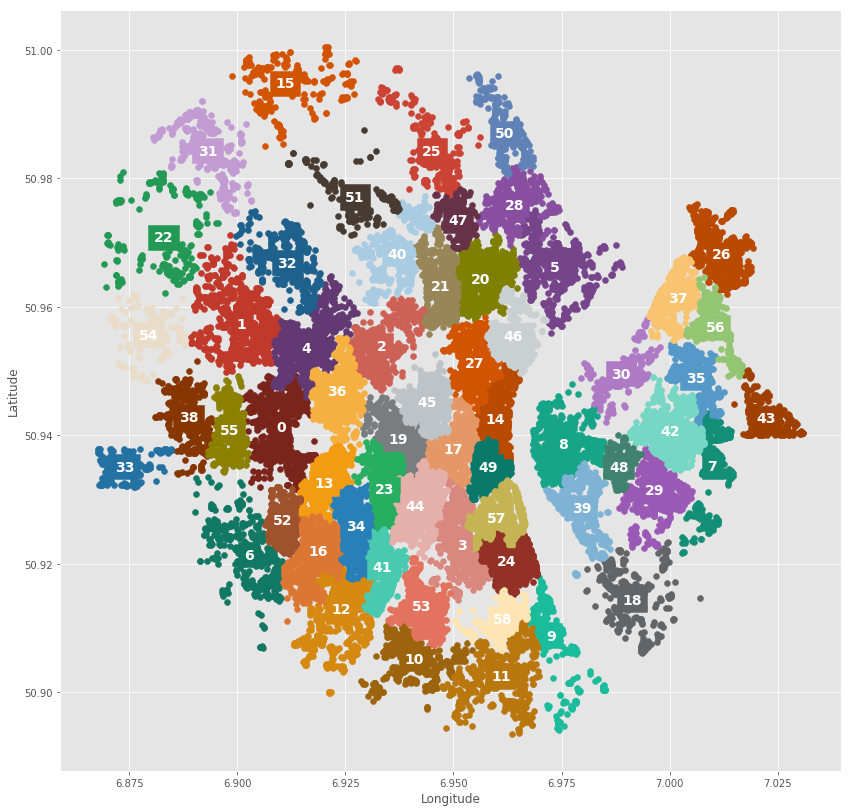

In [32]:
#create a new figure
plt.figure(figsize=(14,14))

#loop through labels and plot each cluster
for l in labels2:

    #add data points 
    plt.scatter(x=df_locations.loc[df_locations['cluster2']==l, 'lng'], 
                y=df_locations.loc[df_locations['cluster2']==l, 'lat'], 
                color=customPalette[l], 
                alpha=1)
    
    #add label
    plt.annotate(l, 
                 df_locations.loc[df_locations['cluster2']==l,['lng','lat']].mean(),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=14, weight='bold',
                 color='white',
                 backgroundcolor=customPalette[l]) 
plt.xlabel('Longitude')
plt.ylabel('Latitude')